In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
%matplotlib inline

In [2]:
imdb_raw = pd.read_csv('imdb_labelled.txt', '\t')
imdb_raw.columns = ['text', 'score']

In [3]:
#positive keywords
keywords = ['amazing', 'awesome', 'beautiful', 'best', 'entertaining', 'enjoyed', 'fun', 'like', 'loved', 'love', 'outstanding', 'recommend', 'recommended', 'strong', 'wonderful']

for key in keywords:
    imdb_raw[str(key)] = imdb_raw.text.str.contains(
        str(key), 
        case=False
    )

In [4]:
#negative and positive percent
raw_count = imdb_raw.score.value_counts()
print('Total\nPercent Positive is: {}\tPercent Negative is: {}'.format(100*raw_count[0]/(imdb_raw.shape[0]), 100*raw_count[1]/(imdb_raw.shape[0]))) 

#groups of 75% and 25%
np.random.seed(232)
imdb_train = imdb_raw.sample(frac=0.75, replace=False)
imdb_test = imdb_raw.sample(frac=0.25, replace=False)

#determining the negative/positive for the train and test
raw_count_train = imdb_train.score.value_counts()
print('Train\nPercent Positive is: {}\tPercent Negative is: {}'.format(100*raw_count_train[0]/(imdb_train.shape[0]), 100*raw_count_train[1]/(imdb_train.shape[0]))) 

raw_count_test = imdb_test.score.value_counts()
print('Test\nPercent Positive is: {}\tPercent Negative is: {}'.format(100*raw_count_test[0]/(imdb_test.shape[0]), 100*raw_count_test[1]/(imdb_test.shape[0])))

Total
Percent Positive is: 48.32663989290495	Percent Negative is: 51.67336010709505
Train
Percent Positive is: 48.214285714285715	Percent Negative is: 51.785714285714285
Test
Percent Positive is: 56.68449197860963	Percent Negative is: 43.31550802139037


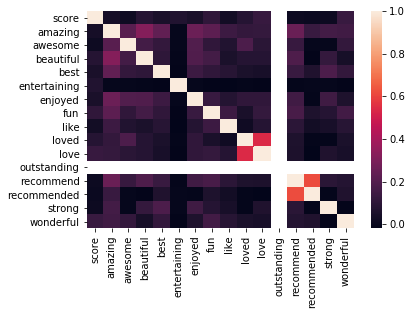

In [5]:
sns.heatmap(imdb_raw.corr())

In [6]:
data_train = imdb_train[keywords]
target_train = imdb_train['score']

data_test = imdb_test[keywords]
target_test = imdb_test['score']

In [7]:
bnb = BernoulliNB()

bnb.fit(data_train, target_train)
y_pred_test = bnb.predict(data_test)

print("Out of a total {} points : There are {} mislabeled points.".format(
    data_test.shape[0],
    (target_test != y_pred_test).sum()
))

#mislabeled percentages
print('Accuracy is: ', (100 * ((target_test == y_pred_test).sum()) /data_test.shape[0]), '%')
conf = confusion_matrix(target_test, y_pred_test)
print(conf)
print('The sensitivity percentage is: ', 100*conf[1,1] / (conf[1,1] + conf[1,0]), '%')
print('The specificity percentage is: ', 100*conf[0,0] / (conf[0,0] + conf[0,1]), '%')

Out of a total 187 points : There are 66 mislabeled points.
Accuracy is:  64.70588235294117 %
[[96 10]
 [56 25]]
The sensitivity percentage is:  30.864197530864196 %
The specificity percentage is:  90.56603773584905 %


In [8]:
from sklearn.naive_bayes import BernoulliNB

data = imdb_raw[keywords]
target = imdb_raw['score']


bnb = BernoulliNB()
bnb.fit(data, target)
y_pred = bnb.predict(data)

print(f'Out of {data.shape[0]} mislabeled points, {(target != y_pred).sum()} were mislabeled.')

Out of 747 mislabeled points, 297 were mislabeled.


In [9]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print(f'20% Holdout is: {bnb.fit(X_train, y_train).score(X_test, y_test)}')
print(f'The "Testing on Sample" is: {bnb.fit(data, target).score(data, target)}')

20% Holdout is: 0.6
The "Testing on Sample" is: 0.6024096385542169


In [10]:
df_confusion = pd.crosstab(target, y_pred)
df_confusion

col_0,0,1
score,,
0,328,33
1,264,122


In [11]:
cross_val_score(bnb, data, target, cv=10)

array([0.53947368, 0.61333333, 0.53333333, 0.57333333, 0.56      ,
       0.53333333, 0.63513514, 0.60810811, 0.63513514, 0.56756757])

In [12]:
i = 0

for i in np.arange(len(keywords)):
    
    data = data_train.iloc[:, i:i+1]
    bnb = BernoulliNB()    
    bnb.fit(data, target_train)    
    y_pred_test = bnb.predict(data_test.iloc[:, i:i+1])
    print('The feature {}: {}'.format(i, keywords[i]))
    print('The accuracy is: ', (100 * ((target_test == y_pred_test).sum()) /data_test.shape[0]), '%')
    conf = confusion_matrix(target_test, y_pred_test)
    print(conf)
    print('The sensitivity rate is: ', 100*conf[1,1] / (conf[1,1] + conf[1,0]), '%')
    print('The specificity rate is: ', 100*conf[0,0] / (conf[0,0] + conf[0,1]), '%')
    print()
    i += 1

The feature 0: amazing
The accuracy is:  43.31550802139037 %
[[  0 106]
 [  0  81]]
The sensitivity rate is:  100.0 %
The specificity rate is:  0.0 %

The feature 1: awesome
The accuracy is:  43.31550802139037 %
[[  0 106]
 [  0  81]]
The sensitivity rate is:  100.0 %
The specificity rate is:  0.0 %

The feature 2: beautiful
The accuracy is:  43.31550802139037 %
[[  0 106]
 [  0  81]]
The sensitivity rate is:  100.0 %
The specificity rate is:  0.0 %

The feature 3: best
The accuracy is:  43.31550802139037 %
[[  0 106]
 [  0  81]]
The sensitivity rate is:  100.0 %
The specificity rate is:  0.0 %

The feature 4: entertaining
The accuracy is:  43.31550802139037 %
[[  0 106]
 [  0  81]]
The sensitivity rate is:  100.0 %
The specificity rate is:  0.0 %

The feature 5: enjoyed
The accuracy is:  43.31550802139037 %
[[  0 106]
 [  0  81]]
The sensitivity rate is:  100.0 %
The specificity rate is:  0.0 %

The feature 6: fun
The accuracy is:  43.31550802139037 %
[[  0 106]
 [  0  81]]
The sensit

In [13]:
i = 1
kw = keywords[0:4] + keywords[5:9] + keywords[10:14]

data_train = imdb_train[kw]
target_train = imdb_train['score']

data_test = imdb_test[kw]
target_test = imdb_test['score']

bnb = BernoulliNB()

bnb.fit(data_train, target_train)

y_pred_test = bnb.predict(data_test)

#Mislabeled
print('The features are: ', kw)
print('The accuracy rate: ', (100 * ((target_test == y_pred_test).sum()) /data_test.shape[0]), '%')
conf = confusion_matrix(target_test, y_pred_test)
print(conf)
print('The sensitivity rate: ', 100*conf[1,1] / (conf[1,1] + conf[1,0]), '%')
print('The specificity rate: ', 100*conf[0,0] / (conf[0,0] + conf[0,1]), '%')
i += 1

The features are:  ['amazing', 'awesome', 'beautiful', 'best', 'enjoyed', 'fun', 'like', 'loved', 'outstanding', 'recommend', 'recommended', 'strong']
The accuracy rate:  62.5668449197861 %
[[98  8]
 [62 19]]
The sensitivity rate:  23.45679012345679 %
The specificity rate:  92.45283018867924 %
